# Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


***
##  Task 1: SEE THE BIG PICTURE
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

### Context of Assigment 1: <br>
In this assignment, we are predicting the medical cost billed to a patient by regression modeling. Specifically, we are implementing gradient descent modeling and the normal equation to predict the medical cost. In this dataset, multiple features are considered the inputs, including age, bmi, and smoking habits, while the charges billed by health insurance are the outputs we are predicting. In theory, certain traits of a patient cause differing medical expenses. For example, someone who smokes may incure higher medical costs than someone who does not smoke due to the higher risk of pulmonary disease and cancer due to smoking.

In [ ]:
# import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# load the insurance data from disk
def loadData(insurance_file):
  insurance = pd.read_csv(insurance_file)
  return insurance

# call the function to load dataset
insurance = loadData("insurance.csv")
# display the first ten rows of the data to check DataFrame structure
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
# let's view a quick summary of the data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# let's now view some basic statistics about the dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### output from insurance.info() <br>
How big is your dataset?<br> **0.0733 MB** <br><br>
How many entries does it have?<br> **1338** <br><br>
How many features does it have?<br> **7 features, including id (6 features without id)** <br><br>
Does it contain any categorical data?<br> **Yes, like ["Sex"] and ["Smoker"].** <br><br>
Is there any missing values?<br> **No, there are no missing values.** <br><br>
What are some basic statistics you can learn right away about this dataset? <br>
**Some basic statistics include:** <br>
**The average insurance charges is $13,270.** <br>
**The average age of the patient is 39 years.** <br>
**More statistics can be found above in the insurance.describe() results.** <br>

---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING 

**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

In [ ]:
# let's import some important packages
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from pickle import TRUE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f083663d2d0>,
      dtype=object)

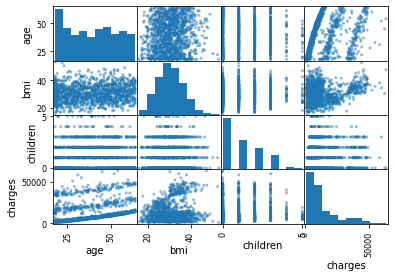

In [ ]:
# step 1. data discovery, let's examine potenetial correlations between the features
correlations = insurance.corr()
correlations.shape
scatter_matrix(insurance)

In [ ]:
# step 1.2: spliting the insurance data into training set (80%), testing set (20%)
# note: we do not need validation for this assignment
train_set, test_set = train_test_split(insurance, test_size=0.2, random_state=42)

insurance = train_set.drop("charges", axis=1)
y_train = train_set["charges"].copy()
y_test = test_set["charges"].copy()

# we need to reshape y_train and y_test so that they are (1070,1) and (268,1)
y_train = np.array(y_train)
y_train = y_train.reshape(len(y_train), 1)

y_test = np.array(y_test)
y_test = y_test.reshape(len(y_test), 1)

In [ ]:
# step 2.0: data cleaning
imputer = SimpleImputer(strategy="mean")
insurance_numbers = insurance.select_dtypes(include=[np.number])
imputer.fit(insurance_numbers)
x = imputer.transform(insurance_numbers)
insurance_training = pd.DataFrame(x, columns=insurance_numbers.columns, index=insurance.index)

In [ ]:
# step 2.1: encode categorical values
sex = insurance[["sex"]]
smoker = insurance[["smoker"]]
region = insurance[["region"]]

category_encoder = OneHotEncoder(sparse=False)
insurance_cat_sex = category_encoder.fit_transform(sex)
insurance_cat_smoker = category_encoder.fit_transform(smoker)
insurance_cat_region = category_encoder.fit_transform(region)

In [ ]:
# step 3.0: feature scaling
scaler = StandardScaler()
scaler.fit(insurance_training)

StandardScaler()

In [ ]:
# step 4.0: pipeline it!

numbers_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("std_scaler", StandardScaler()),
  ])

numerical_attributes = list(insurance_numbers)
categorical_attributes = ["sex", "smoker", "region"]

full_pipeline = ColumnTransformer([
      ("numerical", numbers_pipeline, numerical_attributes),
      ("categorical", OneHotEncoder(), categorical_attributes)
  ])

X_train = full_pipeline.fit_transform(insurance)
X_test = full_pipeline.transform(test_set)

In [ ]:
# final: let's do some checks to ensure our data dimensions are as expected:
print("X_train shape:", np.shape(X_train))
print("X_test shape:", np.shape(X_test))
print("y_train shape:", np.shape(y_train))
print("y_test shape:", np.shape(y_test))

X_train shape: (1070, 11)
X_test shape: (268, 11)
y_train shape: (1070, 1)
y_test shape: (268, 1)


- - -
## Task 3. IMPLEMENT GRADIENT DESCENT 
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [ ]:
# task 3: implement gradient descent and the normal equation methods within MyLinearRegression class
class MyLinearRegression:
  """
  Linear regression is an analysis tool that predicts a variable's value based
  on another variable.

  https://www.ibm.com/topics/linear-regression
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = np.random.randn(len(X_train[0])+1,1) # parameter vector
    self.alpha = 0.1 # learning rate
    self.cost  = [] # cost function

  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    """
    Implementatation of the gradient descent

    params:
      alpha: the learning rate
      iters: number of iterations

    returns:
      theta: updated value for theta
      cost: value of the cost function
    """
    m = len(X_train)  # m = number of samples (1070, training)
    cost = []
    theta = np.random.randn(len(X_train[0])+1,1)
    X_b = np.c_[np.ones((len(X_train),1)), X_train]  # concatenates x0 with X-train data

    for i in range(iters):
      gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train)
      theta = theta - alpha * gradients
      cost.append((X_b.dot(theta).T.dot(X_b).dot(theta)) - (2*(X_b.dot(theta).T.dot(y_train))) + (y_train.T.dot(y_train)))
    return theta, cost

  def fitUsingGradientDescent(self, X_train, y_train):
    """
    Train the regressor using gradient descent
    """
    iterations = 1000
    self.theta, cost = myGradientDescentModel.gradientDescent(X_train, y_train, self.theta, self.alpha, iterations)

  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    Must use np.linalg.pinv() to avoid floating point errors (piazza post)
    """
    X_b = np.c_[np.ones((len(X_train),1)), X_train]
    self.theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

  def predict(self, X_test):
    """
    Predicting the label using test data
    """
    X_test = np.c_[np.ones((len(X_test),1)), X_test]
    y_predict = X_test.dot(self.theta)
    return y_predict

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    print("Parameter vector is %f" % self.theta)
    
# calls the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

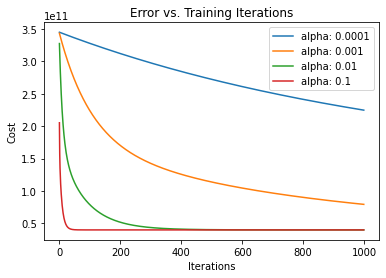

In [ ]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You must plot multiple curves corresponding to different learning rates to justify the best one.
iterations = [1000]
alphas = [0.0001, 0.001, 0.01, 0.1]
theta = np.random.randn(len(X_train[0])+1,1)

for i in range(len(iterations)):
  for j in range(len(alphas)):
    theta, cost = myGradientDescentModel.gradientDescent(X_train, y_train, theta, alphas[j], iterations[i])
    plt.plot([i[0] for i in cost], label='alpha: ' + str(alphas[j]))

plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.legend()
plt.title('Error vs. Training Iterations')
plt.show()

### **Best learning rate (alpha) = 0.1** <br>
A learning rate of 0.1 allows for the dataset to converge quickly without diverging, as seen by the rapid convergence to a small cost value.

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [ ]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS 

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you must use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [ ]:
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print("SGD Regressor RMSE value:", mySGDModel_rmse)

# myGradientDescentModel_rmse
y_predict = myGradientDescentModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
myGradientDescentModel_rmse = np.sqrt(mse)
print("Gradient Descent RMSE value:", myGradientDescentModel_rmse)

# myNormalEquationModel_rmse 
y_predict = myNormalEquationModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
myNormalEquationModel_rmse = np.sqrt(mse)
print("Normal Equation RMSE value:", myNormalEquationModel_rmse)



SGD Regressor RMSE value: 5795.489236476922
Gradient Descent RMSE value: 5796.284659276275
Normal Equation RMSE value: 5796.284659276274


**Which one yields the best performance measure for your dataset?** <br>
The SGD Regressor yields the best performance measurement because the RMSE value is the lowest (\$5,795.49) out of the three methods (the predict medical costs may be \$5,795.49 more or less the actual cost). <br><br>
**What is your assessment of the error? Good? Okay? Terrible?**<br>
I believe that both the Gradient Descent and Normal Equation models were good! Both RMSE values are \$5,796.28, which is only \$0.79 more than the SGD RMSE value. As aforementioned, the SGD Regressor had the best (by just a bit!) RMSE error and so I would rely on that function for insurance cost predictions.

- - -
## Task 6. PRESENT YOUR SOLUTION 

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

mailto: boss [at] insurance [dot] com <br>
from: cnd7cy [at] virginia [dot] edu <br>
subject: [Predicting Insurance Costs for US-based Patients]<br>

Good morning Boss, <br><br>
I hope this email finds you well! I am attaching the medical cost prediction model for your consideration. In this model, I utilized two different regression models-- gradient descent and the normal equation. The gradient descent model searches for the optimal solution through the local gradient of the error (cost) function with respect to theta (the parameter vector). The normal equation finds a theta value that minimizes the cost function in a closed-form solution. Does this sound like CS jargon? No worries! Basically, I utilized regression modeling to find the impact of patient factors (or parameters), like BMI, smoking habits, etc. on medical expenses in order to predict these costs. For our company, we can utilize these predictions to support new customers in selecting their insurance plans that can give them the most protection. <br><br>
I learned that this smaller dataset fairs well with implementation of a Gradient Descent (learning rate = 0.1) and/or Normal Equation model. However, SGD did perform slightly better than my implementation. As a company, I suggest we utilize public algorithms already avaiable to receive the most accurate predictions. <br><br> Moving forward, I suggest we incorporate more powerful regression modeling into our analysis (perhaps a Random Tree regression model) that can provide a more accurate prediction of medical cost.<br><br>
Thank you for your support!<br><br>
Kind regards, <br>
Caroline Davis